In [1]:
import pandas as pd

D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from nsepy import get_history as gh
import datetime as dt

In [3]:
stk_data = pd.read_csv("Tatacoffee13_21.csv")

In [4]:
stk_data['Date'] = pd.to_datetime(stk_data['Date'])

# Filter data for the specified date range
start_date = dt.datetime(2021, 9, 1)
end_date = dt.datetime(2022, 2, 4)
filtered_data = stk_data[(stk_data['Date'] >= start_date) & (stk_data['Date'] <= end_date)]

# Display the filtered data
print(filtered_data)

           Date    Open    High     Low   Close
2144 2021-09-01  214.00  214.25  207.90  211.10
2145 2021-09-02  211.90  213.75  208.70  209.50
2146 2021-09-03  210.00  211.25  206.40  207.60
2147 2021-09-06  207.60  209.50  203.20  204.10
2148 2021-09-07  211.35  217.00  209.60  212.45
...         ...     ...     ...     ...     ...
2220 2021-12-22  202.90  207.80  201.35  205.00
2221 2021-12-23  206.00  206.85  202.05  202.95
2222 2021-12-24  203.90  203.90  199.35  201.00
2223 2021-12-27  200.00  222.00  196.00  218.35
2224 2021-12-28  219.65  220.45  211.55  212.35

[81 rows x 5 columns]


In [5]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [6]:
stk_data

,Open,High,Low,Close
0,1410.60,1427.90,1408.30,1415.10
1,1421.00,1626.60,1416.15,1607.40
2,1632.55,1673.90,1613.05,1626.20
3,1627.75,1627.75,1574.60,1579.05
4,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2220,202.90,207.80,201.35,205.00
2221,206.00,206.85,202.05,202.95
2222,203.90,203.90,199.35,201.00
2223,200.00,222.00,196.00,218.35


In [7]:
column="Close"

In [8]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (2225, 1)


In [9]:
len(data1)

2225

In [10]:
training_size = round(len(data1 ) * 0.98)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

2180
X_train length: (2180, 1)
X_test length: (45, 1)
y_train length: (2180, 1)
y_test length: (45, 1)


In [11]:
import numpy 
import pandas

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

trends = ['n', 't', 'c', 'ct']
lags = [1, 2, 3, 4]
from statsmodels.tsa.ar_model import AutoReg

# Assuming you have already defined X_train, y_test, and data1 appropriately

def rmsemape(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, mape

for i in lags:
    for td in trends:
        model = AutoReg(X_train, lags=i, trend=td)
        model_fit = model.fit()
        y_pred = model_fit.predict(start=len(X_train), end=len(data1) - 1)
        mse, mape = rmsemape(y_test, y_pred)
        print("Lag={}, Trend={}, MSE={}, MAPE={:.2f}%".format(i, td, mse, mape))
        print("************")


D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names 

Lag=1, Trend=n, MSE=2.181131674906887e-05, MAPE=4.69%
************
Lag=1, Trend=t, MSE=2.2219652639301433e-05, MAPE=4.13%
************
Lag=1, Trend=c, MSE=1.9883389234431306e-05, MAPE=4.08%
************
Lag=1, Trend=ct, MSE=3.146856105248509e-05, MAPE=5.48%
************
Lag=2, Trend=n, MSE=3.046454863983536e-05, MAPE=5.38%
************
Lag=2, Trend=t, MSE=2.1761307169386634e-05, MAPE=4.08%
************
Lag=2, Trend=c, MSE=1.913178599499581e-05, MAPE=4.04%
************
Lag=2, Trend=ct, MSE=5.551953282623796e-05, MAPE=6.95%
************
Lag=3, Trend=n, MSE=2.974486831422166e-05, MAPE=5.34%
************
Lag=3, Trend=t, MSE=2.2095774526414983e-05, MAPE=4.11%
************
Lag=3, Trend=c, MSE=1.903126987789261e-05, MAPE=4.06%
************
Lag=3, Trend=ct, MSE=4.718066409352799e-05, MAPE=6.48%
************
Lag=4, Trend=n, MSE=2.7203167098218136e-05, MAPE=5.15%
************
Lag=4, Trend=t, MSE=2.2392563677099807e-05, MAPE=4.13%
************
Lag=4, Trend=c, MSE=1.922841132595301e-05, MAPE=4.07%

D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [13]:
!pip install networkx

In [14]:
len(y_pred)

45

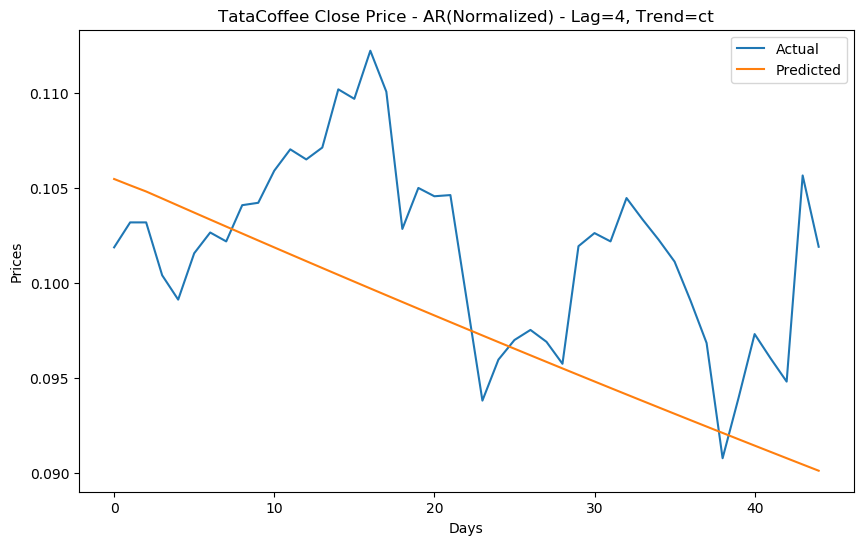

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - AR(Normalized) - Lag={}, Trend={}'.format(i, td))
plt.legend()
plt.show()

In [16]:
len(data1)

2225

In [17]:
y_test

array([[0.10188892],
       [0.1032024 ],
       [0.1032024 ],
       [0.10041906],
       [0.09913685],
       [0.10157618],
       [0.10267075],
       [0.10220165],
       [0.10410933],
       [0.10423443],
       [0.10592319],
       [0.10704904],
       [0.10651739],
       [0.10714286],
       [0.11020766],
       [0.10970728],
       [0.11224043],
       [0.11008256],
       [0.10285839],
       [0.10501626],
       [0.10457843],
       [0.10464098],
       [0.09923067],
       [0.09382037],
       [0.09597823],
       [0.09701026],
       [0.09754191],
       [0.09691644],
       [0.09575932],
       [0.10195146],
       [0.10263948],
       [0.10220165],
       [0.10448461],
       [0.10335877],
       [0.10229547],
       [0.10113835],
       [0.09907431],
       [0.09685389],
       [0.09078684],
       [0.09397673],
       [0.09732299],
       [0.09604078],
       [0.09482112],
       [0.105673  ],
       [0.10192019]])

In [18]:

# Assuming you have already defined y_test and column variables
# y_test should be a one-dimensional array or list
# column should be the column name or index of the column to be extracted

# Convert y_test to a DataFrame with a column named 'Close'
aTestNormTable = pd.DataFrame({'Close': np.array(y_test).flatten()})

# Now aTestNormTable contains the converted table
# You can use it as needed in your code
print(aTestNormTable.head())



      Close
0  0.101889
1  0.103202
2  0.103202
3  0.100419
4  0.099137


In [19]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [20]:
actual_stock_price_test_ori

array([[212.3 ],
       [214.4 ],
       [214.4 ],
       [209.95],
       [207.9 ],
       [211.8 ],
       [213.55],
       [212.8 ],
       [215.85],
       [216.05],
       [218.75],
       [220.55],
       [219.7 ],
       [220.7 ],
       [225.6 ],
       [224.8 ],
       [228.85],
       [225.4 ],
       [213.85],
       [217.3 ],
       [216.6 ],
       [216.7 ],
       [208.05],
       [199.4 ],
       [202.85],
       [204.5 ],
       [205.35],
       [204.35],
       [202.5 ],
       [212.4 ],
       [213.5 ],
       [212.8 ],
       [216.45],
       [214.65],
       [212.95],
       [211.1 ],
       [207.8 ],
       [204.25],
       [194.55],
       [199.65],
       [205.  ],
       [202.95],
       [201.  ],
       [218.35],
       [212.35]])

In [21]:
actual_stock_price_test_ori_flat = np.ravel(actual_stock_price_test_ori)

# Create a DataFrame with a column named 'Close' using the flattened array
actual_stock_price_test_oriA = pd.DataFrame({'Close': actual_stock_price_test_ori_flat})



In [22]:
actual_stock_price_test_oriA

,Close
0,212.30
1,214.40
2,214.40
3,209.95
4,207.90
5,211.80
6,213.55
7,212.80
8,215.85
9,216.05


In [23]:
y_test_series = pd.Series(y_test.flatten())  # Use flatten() to ensure y_test is 1-dimensional

# Convert y_test_series to a DataFrame with a column named 'Close'
aTestNormTable = pd.DataFrame({'Close': y_test_series})

# Convert actual_stock_price_test_ori to a pandas Series
actual_stock_price_test_ori_series = pd.Series(actual_stock_price_test_ori.flatten())  # Use flatten() to ensure actual_stock_price_test_ori is 1-dimensional

# Convert actual_stock_price_test_ori_series to a DataFrame with a column named 'Close'
actual_stock_price_test_oriA = pd.DataFrame({'Close': actual_stock_price_test_ori_series})

# If you want to rescale 'Close' column back to its original values using the MinMaxScaler
Ms = MinMaxScaler()
Ms.fit(actual_stock_price_test_oriA[['Close']])  # Fit the scaler on the original data
actual_stock_price_test_oriA[['Close']] = Ms.inverse_transform(actual_stock_price_test_oriA[['Close']])

# Now aTestNormTable and actual_stock_price_test_oriA contain the converted tables
# You can use them as needed in your code
#print(aTestNormTable)
#print(actual_stock_price_test_oriA)

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming you have already defined y_pred, column, and X_test variables
# y_pred should be a one-dimensional array or list
# column should be the column name to be extracted from X_test
# X_test should be a two-dimensional array

# Convert y_pred to a pandas Series
y_pred_series = pd.Series(y_pred)

# Convert y_pred_series to a DataFrame with a column named 'Close'
pTestNormTable = pd.DataFrame({'Close': y_pred_series})

# If you want to rescale 'Close' column back to its original values using the MinMaxScaler
Ms = MinMaxScaler()

# Fit the scaler on the original data
column_index = X_test.shape[1] - 1  # Assuming 'Close' column is the last column in X_test
Ms.fit(X_test[:, column_index].reshape(-1, 1))

# Inverse transform the predicted values
predicted_stock_price_test_ori = Ms.inverse_transform(pTestNormTable)

# Convert the resulting NumPy array back to a pandas DataFrame
predicted_stock_price_test_oriP = pd.DataFrame({'Close': predicted_stock_price_test_ori.flatten()})

# Now pTestNormTable and predicted_stock_price_test_oriP contain the converted tables
# You can use them as needed in your code
print(pTestNormTable)
print(predicted_stock_price_test_oriP)


       Close
0   0.105487
1   0.105154
2   0.104829
3   0.104460
4   0.104089
5   0.103718
6   0.103350
7   0.102982
8   0.102616
9   0.102251
10  0.101887
11  0.101524
12  0.101162
13  0.100801
14  0.100441
15  0.100082
16  0.099725
17  0.099368
18  0.099013
19  0.098658
20  0.098305
21  0.097952
22  0.097601
23  0.097251
24  0.096902
25  0.096553
26  0.096206
27  0.095860
28  0.095515
29  0.095171
30  0.094828
31  0.094486
32  0.094145
33  0.093805
34  0.093466
35  0.093128
36  0.092790
37  0.092454
38  0.092119
39  0.091785
40  0.091452
41  0.091120
42  0.090789
43  0.090459
44  0.090129
       Close
0   0.093050
1   0.093043
2   0.093036
3   0.093028
4   0.093020
5   0.093012
6   0.093004
7   0.092996
8   0.092988
9   0.092980
10  0.092973
11  0.092965
12  0.092957
13  0.092949
14  0.092942
15  0.092934
16  0.092926
17  0.092919
18  0.092911
19  0.092903
20  0.092896
21  0.092888
22  0.092881
23  0.092873
24  0.092866
25  0.092858
26  0.092851
27  0.092843
28  0.092836
29  0.092829

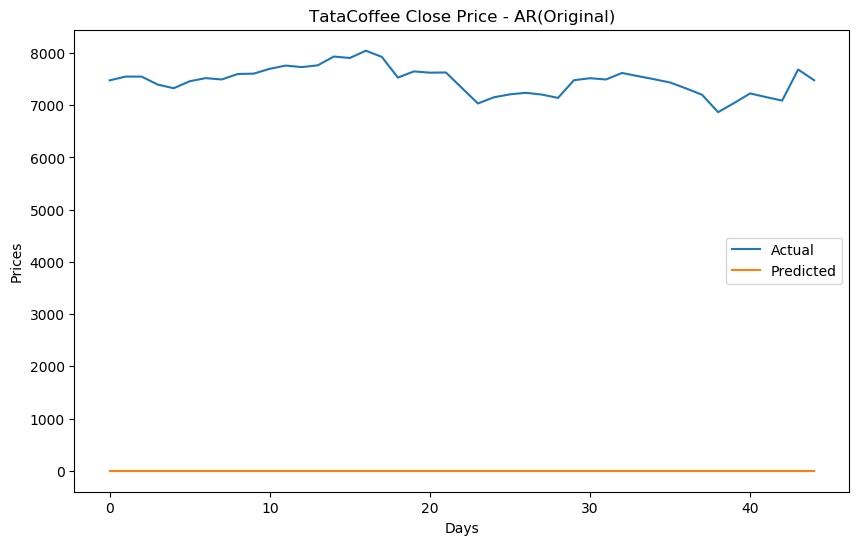

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_stock_price_test_oriA, label='Actual')
plt.plot(predicted_stock_price_test_oriP, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - AR(Original)')
plt.legend()
plt.show()


In [28]:
import numpy as np

def rmsemape(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

rmse, mape = rmsemape(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)
#print("RMSE:", rmse['Close'])
#print("MAPE: {:.2f}%".format(mape['Close']))


In [29]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [30]:
forecast

array([0.08980108, 0.08947376, 0.08914739, 0.08882198])

In [31]:
# Convert forecast to a DataFrame with a column named 'Closefore'
fTestNormTable = pd.DataFrame({'Closefore': forecast})

# If you want to rescale 'Closefore' column back to its original values using the MinMaxScaler
Ms = MinMaxScaler()
Ms.fit(fTestNormTable[['Closefore']].values.reshape(-1, 1))  # Fit the scaler on the original data
forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable[['Closefore']])

# Now forecast_stock_price_test_ori contains the converted forecast values

# If you want to convert forecast_stock_price_test_ori back to a DataFrame with a column named 'Closefore'
forecast_stock_price_test_oriF = pd.DataFrame({'Closefore': forecast_stock_price_test_ori[:, 0]})


In [32]:
forecast_stock_price_test_oriF

,Closefore
0,0.088910
1,0.088910
2,0.088909
3,0.088909


In [33]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

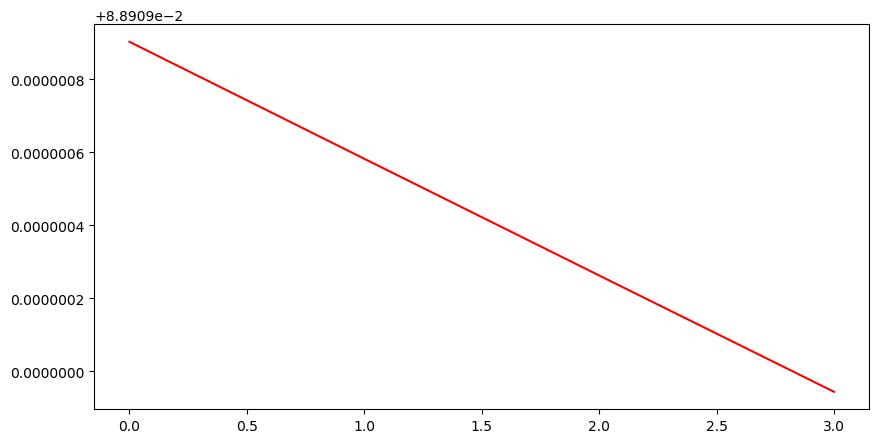

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2000:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")